[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/obss/sahi/blob/main/demo/inference_for_yolonas.ipynb)

## 0. Preperation

- Install latest version of SAHI and super-gradients

  **_Note_:** For Windows, You should have installed Microsoft Visual C++ Build Tools to install super-gradients properly (required for pycocotools)

In [ ]:
!pip install -U torch sahi super-gradients

In [1]:
import os
os.getcwd()

'c:\\Users\\kadir\\dev\\sahi'

- Import required modules:

In [2]:
# arrange an object detection model for test
from sahi.utils.yolonas import download_yolonas_s_model

from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

c:\Users\kadir\anaconda3\envs\sahiyolonas\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The console stream is logged into C:\Users\kadir\sg_logs\console.log


[2023-05-11 16:57:56] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-05-11 16:58:00] WARNING - redirects.py - NOTE: Redirects are currently not supported in Windows or MacOs.
[2023-05-11 16:58:09] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-05-11 16:58:09] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-05-11 16:58:09] WARNING - export.py - Failed to import pytorch_quantization
[2023-05-11 16:58:09] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-05-11 16:58:09] WARNING - env_sanity_check.py - Failed to verify operating system: Deci officially supports only Linux kernels. Some features may not work as expected.


- Download a YOLO-NAS model and two test images:

In [3]:
# download YOLO_NAS_S model to 'models/yolo_nas_s_coco.pt'
yolonas_model_path = "models/yolo_nas_s_coco.pt"
download_yolonas_s_model(yolonas_model_path)

# download test images into demo_data folder
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

## 1. Standard Inference with a YOLO-NAS Model

- Instantiate a detection model by defining model weight path and other parameters:

If you are using a model trained with custom class names and number, you should provide also a YAML file path. YAML format should be as below example, each line has a class name starting with a hyphen and space:
```yaml
- cat
- dog
- bird
```

In [4]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolonas',
    model_name="yolo_nas_s",
    class_names_yaml_path="tests/data/coco_utils/coco_class_names.yaml", # required if model_path is provided
    model_path=yolonas_model_path, # If model_path is not provided, model is downloaded from Deci-AI remote client automatically
    confidence_threshold=0.3,
    device="cpu", # or 'cuda:0'
)

[2023-05-11 16:58:28] INFO - checkpoint_utils.py - Successfully loaded model weights from models/yolo_nas_s_coco.pt checkpoint.


- Perform prediction by feeding the get_prediction function with an image path and a DetectionModel instance:

In [5]:
result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model)

- Or perform prediction by feeding the get_prediction function with a numpy image and a DetectionModel instance:

In [6]:
result = get_prediction(read_image("demo_data/small-vehicles1.jpeg"), detection_model)

- Visualize predicted bounding boxes and masks over the original image:

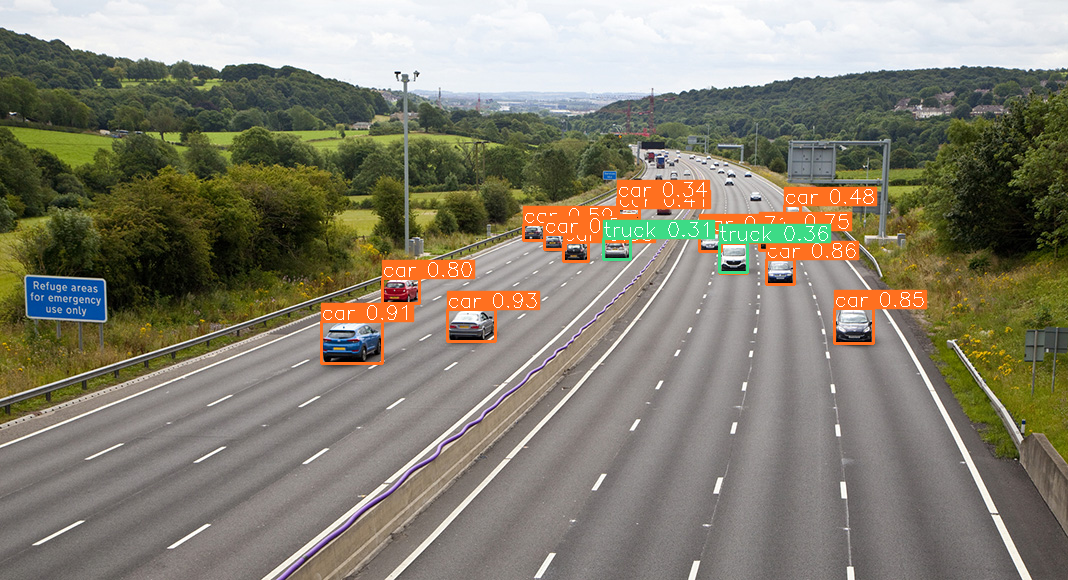

In [7]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 2. Sliced Inference with a YOLO-NAS Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [8]:
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Performing prediction on 15 number of slices.


- Visualize predicted bounding boxes and masks over the original image:

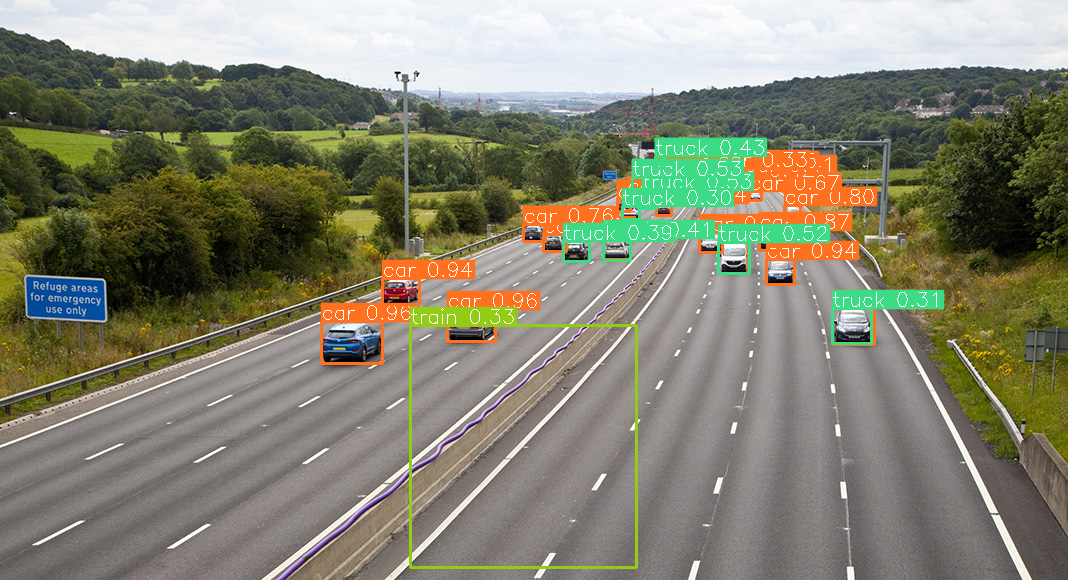

In [9]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

- You can set a higher confidence threshold to eliminate FP detections as in above inference output

## 3. Prediction Result

- Predictions are returned as [sahi.prediction.PredictionResult](sahi/prediction.py), you can access the object prediction list as:

In [10]:
object_prediction_list = result.object_prediction_list

In [11]:
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(447.9302978515625, 309.31268310546875, 495.56219482421875, 341.2115783691406), w: 47.63189697265625, h: 31.898895263671875>,
    mask: None,
    score: PredictionScore: <value: 0.9606276750564575>,
    category: Category: <id: 2, name: car>>

- ObjectPrediction's can be converted to [COCO annotation](https://cocodataset.org/#format-data) format:

In [12]:
result.to_coco_annotations()[:3]

[{'image_id': None,
  'bbox': [447.9302978515625,
   309.31268310546875,
   47.63189697265625,
   31.898895263671875],
  'score': 0.9606276750564575,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1519},
 {'image_id': None,
  'bbox': [321.7788391113281,
   321.8446044921875,
   61.10430908203125,
   41.66273880004883],
  'score': 0.9583572149276733,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 2545},
 {'image_id': None,
  'bbox': [832.3277835845947,
   308.82257080078125,
   41.79650688171387,
   35.29298400878906],
  'score': 0.9442717432975769,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1475}]

- ObjectPrediction's can be converted to [COCO prediction](https://github.com/i008/COCO-dataset-explorer) format:

In [13]:
result.to_coco_predictions(image_id=1)[:3]

[{'image_id': 1,
  'bbox': [447.9302978515625,
   309.31268310546875,
   47.63189697265625,
   31.898895263671875],
  'score': 0.9606276750564575,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1519},
 {'image_id': 1,
  'bbox': [321.7788391113281,
   321.8446044921875,
   61.10430908203125,
   41.66273880004883],
  'score': 0.9583572149276733,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 2545},
 {'image_id': 1,
  'bbox': [832.3277835845947,
   308.82257080078125,
   41.79650688171387,
   35.29298400878906],
  'score': 0.9442717432975769,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1475}]

- ObjectPrediction's can be converted to [imantics](https://github.com/jsbroks/imantics) annotation format:

In [14]:
result.to_imantics_annotations()[:3]

- ObjectPrediction's can be converted to [fiftyone](https://github.com/voxel51/fiftyone) detection format:

In [ ]:
result.to_fiftyone_detections()[:3]

## 4. Batch Prediction

- Set model and directory parameters:

In [15]:
model_type = "yolonas"
model_name="yolo_nas_s"
model_path = yolonas_model_path
model_device = "cpu" # or 'cuda:0'
model_confidence_threshold = 0.4
class_names_yaml_path = "tests/data/coco_utils/coco_class_names.yaml"

slice_height = 256
slice_width = 256
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "demo_data/"

- Perform sliced inference on given folder:

In [16]:
predict(
    model_type=model_type,
    model_name=model_name,
    model_path=model_path,
    class_names_yaml_path = class_names_yaml_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 3 listed files in folder: demo_data/



[2023-05-11 17:15:53] INFO - checkpoint_utils.py - Successfully loaded model weights from models/yolo_nas_s_coco.pt checkpoint.
Performing inference on images:   0%|          | 0/3 [00:00<?, ?it/s]

Performing prediction on 15 number of slices.


Performing inference on images:  33%|███▎      | 1/3 [00:24<00:49, 24.55s/it]

Prediction time is: 24374.13 ms
Performing prediction on 15 number of slices.


Performing inference on images:  67%|██████▋   | 2/3 [00:48<00:24, 24.20s/it]

Prediction time is: 23797.21 ms
Performing prediction on 20 number of slices.


Performing inference on images: 100%|██████████| 3/3 [01:18<00:00, 26.13s/it]


Prediction time is: 29739.15 ms
Prediction results are successfully exported to runs\predict\exp6
